# CNN for CIFAR-10 dataset

Creating a Convolution Neural Network for the CIFAR-10 dataset for image recognition.

## Loading the dataset


In [1]:
import tensorflow as tf
import numpy as np

# 1. Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

print("CIFAR-10 dataset loaded successfully.")

# 2. Inspect the shapes of the loaded training and testing image and label arrays
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

# 3. Normalise the pixel values of the image data from 0-255 to 0-1 float range
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

print("Image data normalized to 0-1 range and converted to float32.")

# 4. Convert the integer labels to one-hot encoded vectors
# CIFAR-10 has 10 classes
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

print("Labels converted to one-hot encoded vectors.")

print(f"y_train one-hot shape: {y_train.shape}")
print(f"y_test one-hot shape: {y_test.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
CIFAR-10 dataset loaded successfully.
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)
Image data normalized to 0-1 range and converted to float32.
Labels converted to one-hot encoded vectors.
y_train one-hot shape: (50000, 10)
y_test one-hot shape: (10000, 10)


## Define CNN Model Architecture

Creating the neural network architecture


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Initialize a Sequential model
model = Sequential([
    # Add a Conv2D layer with 32 filters, (3, 3) kernel, 'relu' activation, and input_shape
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    # Add a MaxPooling2D layer with (2, 2) pool size
    MaxPooling2D((2, 2)),
    # Add another Conv2D layer with 64 filters, (3, 3) kernel, and 'relu' activation
    Conv2D(64, (3, 3), activation='relu'),
    # Add another MaxPooling2D layer with (2, 2) pool size
    MaxPooling2D((2, 2)),
    # Add a Flatten layer to convert 2D feature maps to 1D feature vector
    Flatten(),
    # Add a Dense layer with 64 units and 'relu' activation
    Dense(64, activation='relu'),
    # Add the final Dense output layer with 10 units (for 10 classes) and 'softmax' activation
    Dense(10, activation='softmax')
])

# Print a summary of the model architecture
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,562 (654.54 KB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

## Compile Model

Configure the CNN model for training by specifying an optimiser, loss function, and evaluation metrics.

In [3]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("Model compiled successfully with Adam optimizer, categorical_crossentropy loss, and accuracy metric.")

Model compiled successfully with Adam optimizer, categorical_crossentropy loss, and accuracy metric.


# Train the model

In [4]:
# Running the model for 10 epochs, more epochs would result in a higher accuracy
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

print("Model training complete. Training history stored in 'history' variable.")

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.3755 - loss: 1.7189 - val_accuracy: 0.5857 - val_loss: 1.1864
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.5912 - loss: 1.1594 - val_accuracy: 0.6100 - val_loss: 1.1233
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.6513 - loss: 1.0058 - val_accuracy: 0.6513 - val_loss: 1.0249
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.6814 - loss: 0.9178 - val_accuracy: 0.6726 - val_loss: 0.9482
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 25ms/step - accuracy: 0.7108 - loss: 0.8384 - val_accuracy: 0.6857 - val_loss: 0.9252
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.7312 - loss: 0.7763 - val_accuracy: 0.6910 - val_loss: 0.9081
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 27ms/step - accuracy: 0.7494 - loss: 0.7284 - val_accuracy: 0.6937 - val_loss: 0.9261
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.7671 -

# Graphing the results

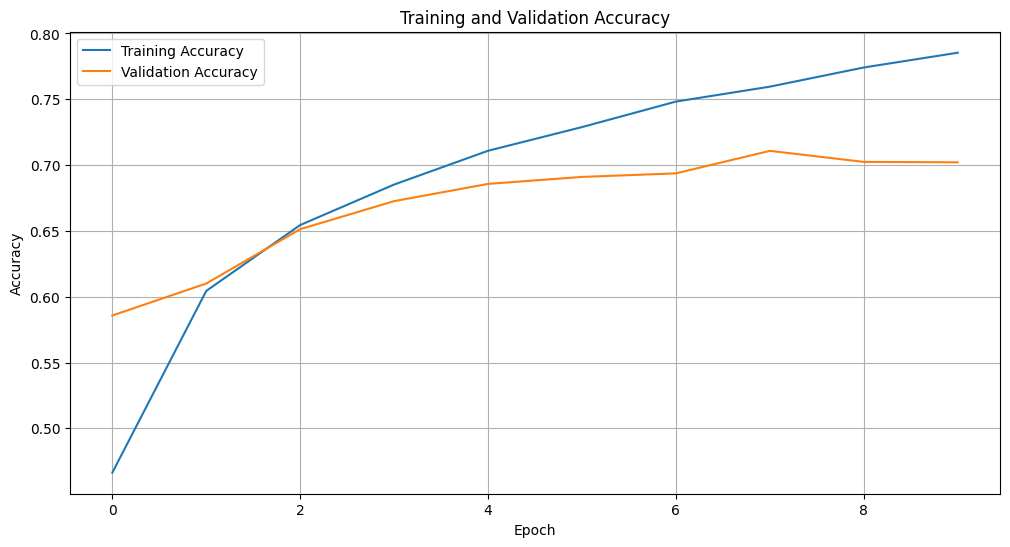

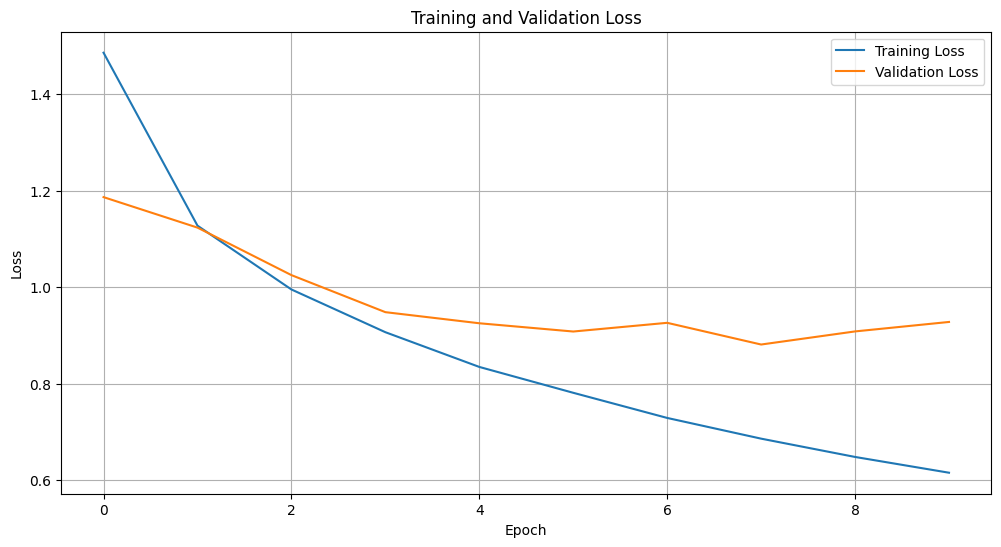

In [5]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

## Evaluate Model Performance

In [6]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)

print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7031 - loss: 0.9250

Test Loss: 0.9279
Test Accuracy: 0.7021


Comparing the training accuracy to the validation accuracy from the plots allows us to assess the model's performance and identify potential overfitting or underfitting:

- If Training Accuracy is much higher than Validation Accuracy: This typically indicates overfitting. The model has learned the training data too well, including its noise, and is not generalizing effectively to unseen data (the validation set).

- If both Training and Validation Accuracy are low: This might suggest underfitting. The model is too simple or hasn't been trained long enough to capture the underlying patterns in the data.

- If Training and Validation Accuracy are close and reasonably high: This is the ideal scenario, indicating a well-generalized model.

Looking at the generated plots, you can observe the trend for both metrics over the training epochs to determine your model's generalization capabilities.
